# Testing the Calculation Without Parameter Uncertanties

In [1]:
%pylab inline
%config InlineBackend.figure_format = 'retina'

Populating the interactive namespace from numpy and matplotlib


In [2]:
import astropy.cosmology as cosmo
from astropy.cosmology import Planck15
import astropy.units as u
import h5py
import model
import multiprocessing as multi
import pymc3 as pm
import seaborn as sns
import theano.tensor as tt

sns.set_context('notebook')
sns.set_style('ticks')
sns.set_palette('colorblind')

In [3]:
with h5py.File('observations.h5', 'r') as f:
    Nobs, Tobs = f.attrs['small']
    Nobs = int(round(Nobs))
    m1s = array(f['m1s'])[:Nobs]
    m2s = array(f['m2s'])[:Nobs]
    zs = array(f['zs'])[:Nobs]
    dls = Planck15.luminosity_distance(zs).to(u.Gpc).value[:Nobs]    

In [4]:
with h5py.File('selected.h5', 'r') as f:
    m1s_det = array(f['m1det'])
    m2s_det = array(f['m2det'])
    dls_det = array(f['dl'])
    wts_det = array(f['wt'])
    N_gen = f.attrs['N_gen']

I got convergence with the ``small`` sample for ``1 << 11`` and ``1 << 12`` below (shift is $< \sigma/2$, at least).  Moving to 1 year, we have 12 times as many samples, so we should increase by 16 ($2^4$), or 15 and 16 in the shift.  In fact, we see convergence in 1 year at ``1 << 15`` and ``1 << 16``.  That suggests that we might have convergence at 5 years by ``1 << 20`` and ``1 << 21``.

In [5]:
ndet = 1 << 15
fdet = float(ndet)/float(m1s_det.shape[0])
mod1 = model.make_model(reshape(m1s*(1+zs), (-1, 1)), reshape(m2s*(1+zs), (-1, 1)), reshape(dls, (-1, 1)), m1s_det[:ndet], m2s_det[:ndet], dls_det[:ndet], wts_det[:ndet], int(round(N_gen*fdet)), Tobs)

In [6]:
ndet = 1 << 16
fdet = float(ndet)/float(m1s_det.shape[0])
mod2 = model.make_model(reshape(m1s*(1+zs), (-1, 1)), reshape(m2s*(1+zs), (-1, 1)), reshape(dls, (-1, 1)), m1s_det[:ndet], m2s_det[:ndet], dls_det[:ndet], wts_det[:ndet], int(round(N_gen*fdet)), Tobs)

In [7]:
d0 = {mod1.R0: 100.0, 
      mod1.alpha: 0.75,
      mod1.beta: 0.0,
      mod1.gamma: 3.0,
      mod1.MMin: 5.0,
      mod1.MMax: 40.0,
      mod1.sigma_low: 0.1,
      mod1.sigma_high: 0.1,
      mod1.H0: 70,
      mod1.Om: 0.3,
      mod1.w: -1}

In [8]:
m1s.shape[0], mod1.mu_N_det.eval(d0), mod1.sigma_N_det.eval(d0), mod1.neff_det.eval(d0)

(64, array([75.21834578]), array([0.93497753]), array([6472.09981525]))

In [9]:
t1 = model.sample(mod1, 1000, 1000, 3)
t2 = model.sample(mod2, 1000, 1000, 3)

Only 2 samples in chain.
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [w, H0, Om, gamma, beta, alpha, unit_normal, R0, MMax, MMin, sigma_high, sigma_low]
Sampling 3 chains: 100%|██████████| 81/81 [01:01<00:00,  1.17s/draws]
Only 2 samples in chain.
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [w, H0, Om, gamma, beta, alpha, unit_normal, R0, MMax, MMin, sigma_high, sigma_low]
Sampling 3 chains: 100%|██████████| 156/156 [00:54<00:00,  2.63draws/s]
Only 2 samples in chain.
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [w, H0, Om, gamma, beta, alpha, unit_normal, R0, MMax, MMin, sigma_high, sigma_low]
Sampling 3 chains: 100%|██████████| 306/306 [00:44<00:00,  5.07draws/s]
The chain contains only diverging samples. The model is probably misspecified.
Only 2 samples in chain.
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [w, H0, Om, gamma, beta, alpha, unit_normal, R0, MMax, MMin, sigma_high, sigma_low]
Sampling 3 chains: 100%|██████████| 606/606 [01:31<00:00,  5.46draws/s]
Onl

In [10]:
truth = {'R0': 100, 'alpha': 0.75, 'beta': 0.0, 'gamma': 3.0, 'sigma_low':0.1, 'sigma_high': 0.1, 
         'MMin': 5.0, 'MMax': 40.0,
         'H0': Planck15.H0.to(u.km/u.s/u.Mpc).value, 'Om': Planck15.Om0, 'w':-1}

/Users/wfarr/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3449: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')
/Users/wfarr/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3449: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')
/Users/wfarr/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3449: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')
/Users/wfarr/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3449: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` inst

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c684663c8>,
      dtype=object)

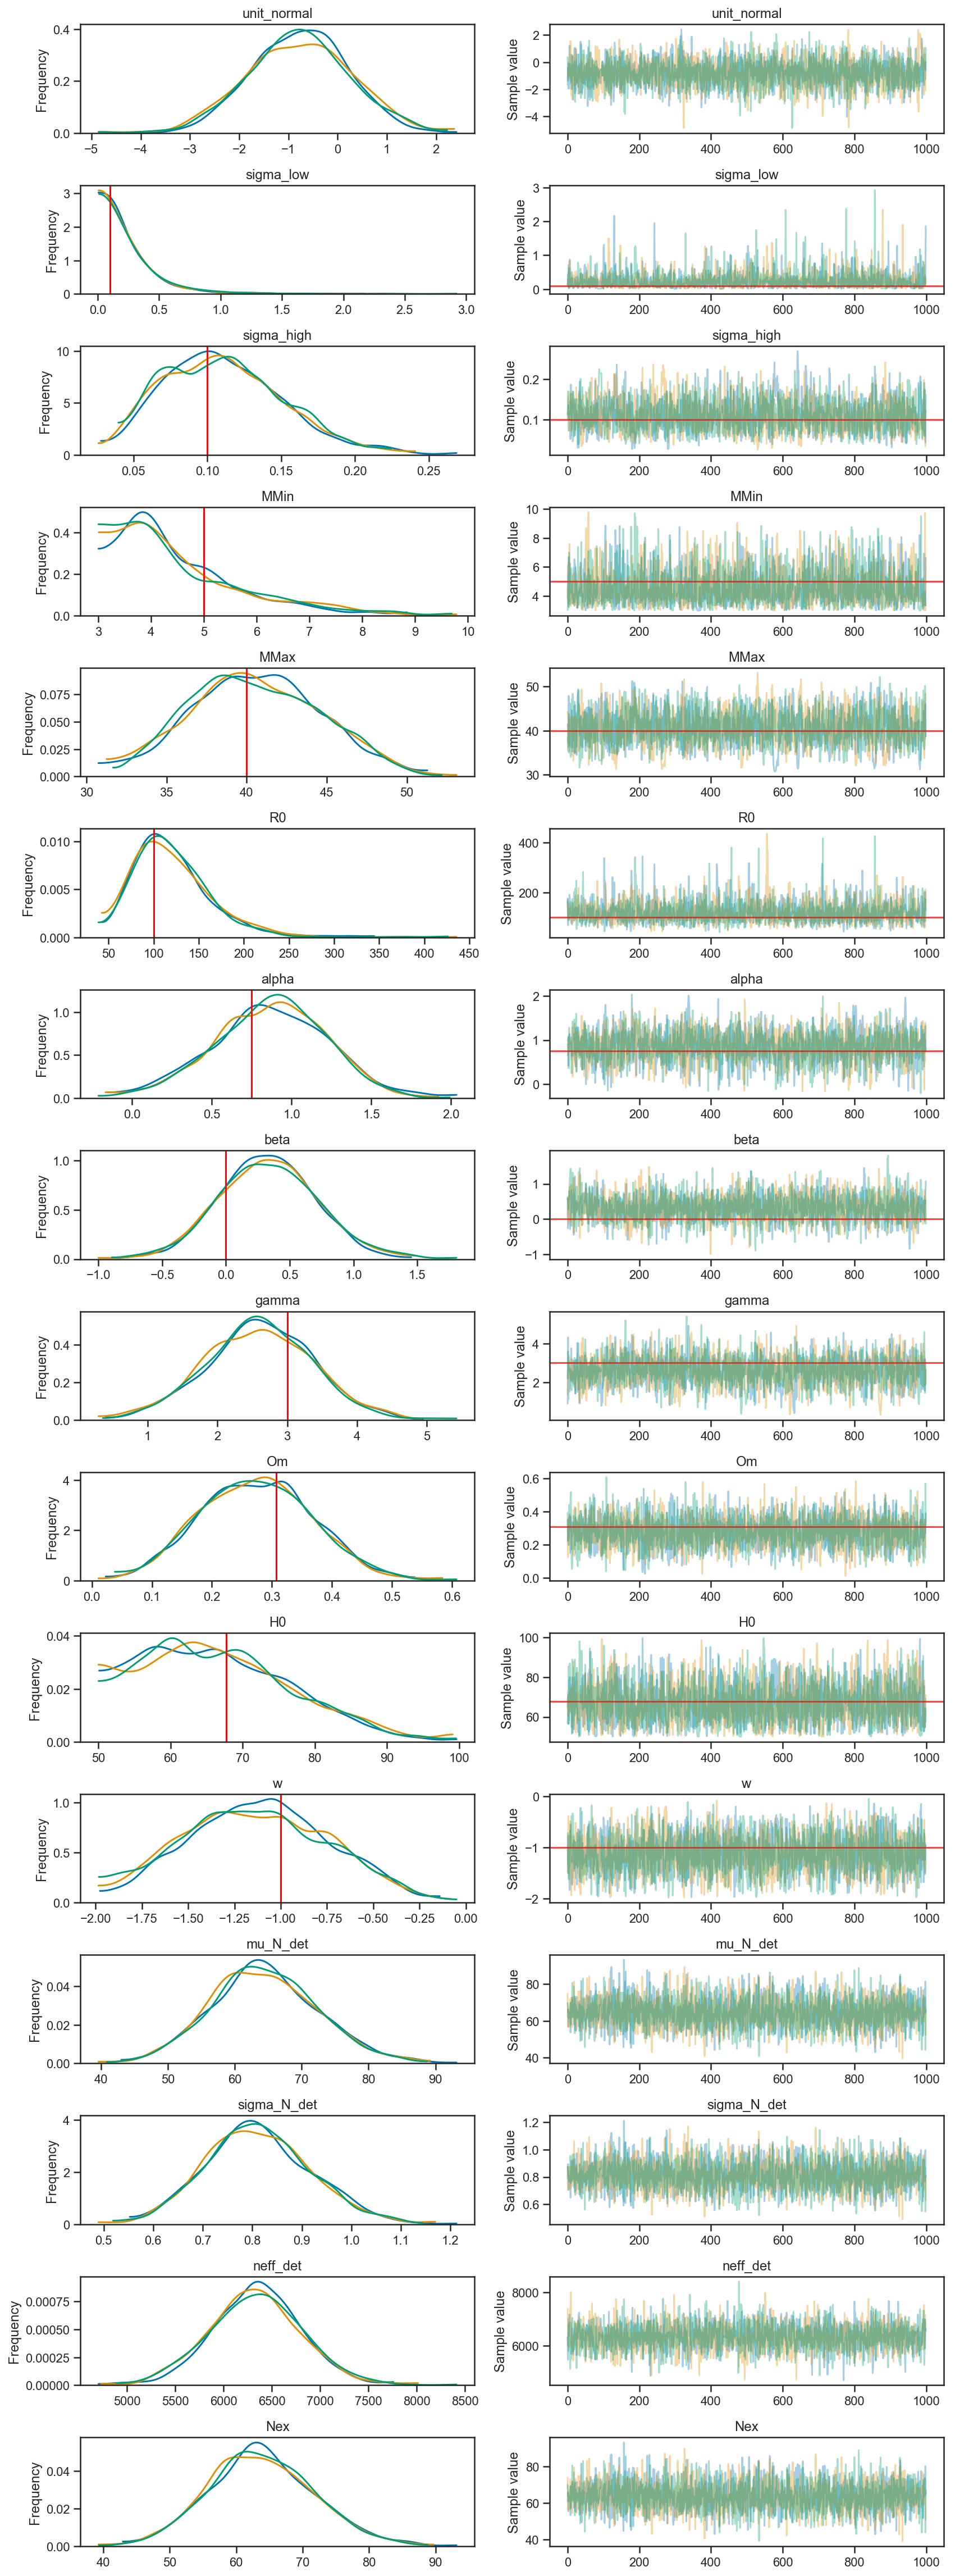

In [11]:
pm.traceplot(t1, lines=truth)

In [12]:
pm.summary(t1)

mean          sd  mc_error      hpd_2.5     hpd_97.5  \
unit_normal       -0.794005    1.015891  0.019827    -2.773462     1.116427   
sigma_low          0.245434    0.247909  0.005221     0.005839     0.706693   
sigma_high         0.110885    0.039971  0.001099     0.041130     0.188370   
MMin               4.501860    1.217499  0.026207     3.000460     7.016175   
MMax              40.548144    4.012950  0.117703    33.128584    48.445879   
R0               120.293576   43.099189  0.837317    54.061417   205.223089   
alpha              0.861180    0.354649  0.008571     0.150176     1.531164   
beta               0.325187    0.380564  0.008654    -0.409987     1.091127   
gamma              2.591302    0.762974  0.016690     1.132791     4.184701   
Om                 0.273031    0.092727  0.001443     0.095791     0.447857   
H0                66.646227   10.217910  0.233720    50.110688    85.435223   
w                 -1.131287    0.385147  0.008607    -1.896039    -0.436693   
mu_N_det__0       64.349915    7.920698  0.149422    48.495315    79.455143   
sigma_N_det__0     0.810691    0.105152  0.002010     0.616956     1.026684   
neff_det__0     6328.491951  468.188130  9.090920  5437.256504  7274.017155   
Nex__0            63.706984    7.824850  0.147219    47.732616    78.380632   

                      n_eff      Rhat  
unit_normal     2508.450640  0.999657  
sigma_low       2060.378003  1.000104  
sigma_high      1290.925245  0.999721  
MMin            2370.192834  0.999696  
MMax            1065.457078  0.999529  
R0              2109.453928  0.999506  
alpha           1897.852953  0.999512  
beta            2183.252179  0.999833  
gamma           1752.708091  1.000011  
Om              2747.445584  0.999566  
H0              1758.517569  0.999897  
w               2279.525623  1.000524  
mu_N_det__0     2894.386816  0.999843  
sigma_N_det__0  2771.197245  0.999620  
neff_det__0     2693.077794  1.000023  
Nex__0          2874.668744  0.999872

/Users/wfarr/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3449: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')
/Users/wfarr/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3449: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')
/Users/wfarr/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3449: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')
/Users/wfarr/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3449: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` inst

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c5d30b940>,
      dtype=object)

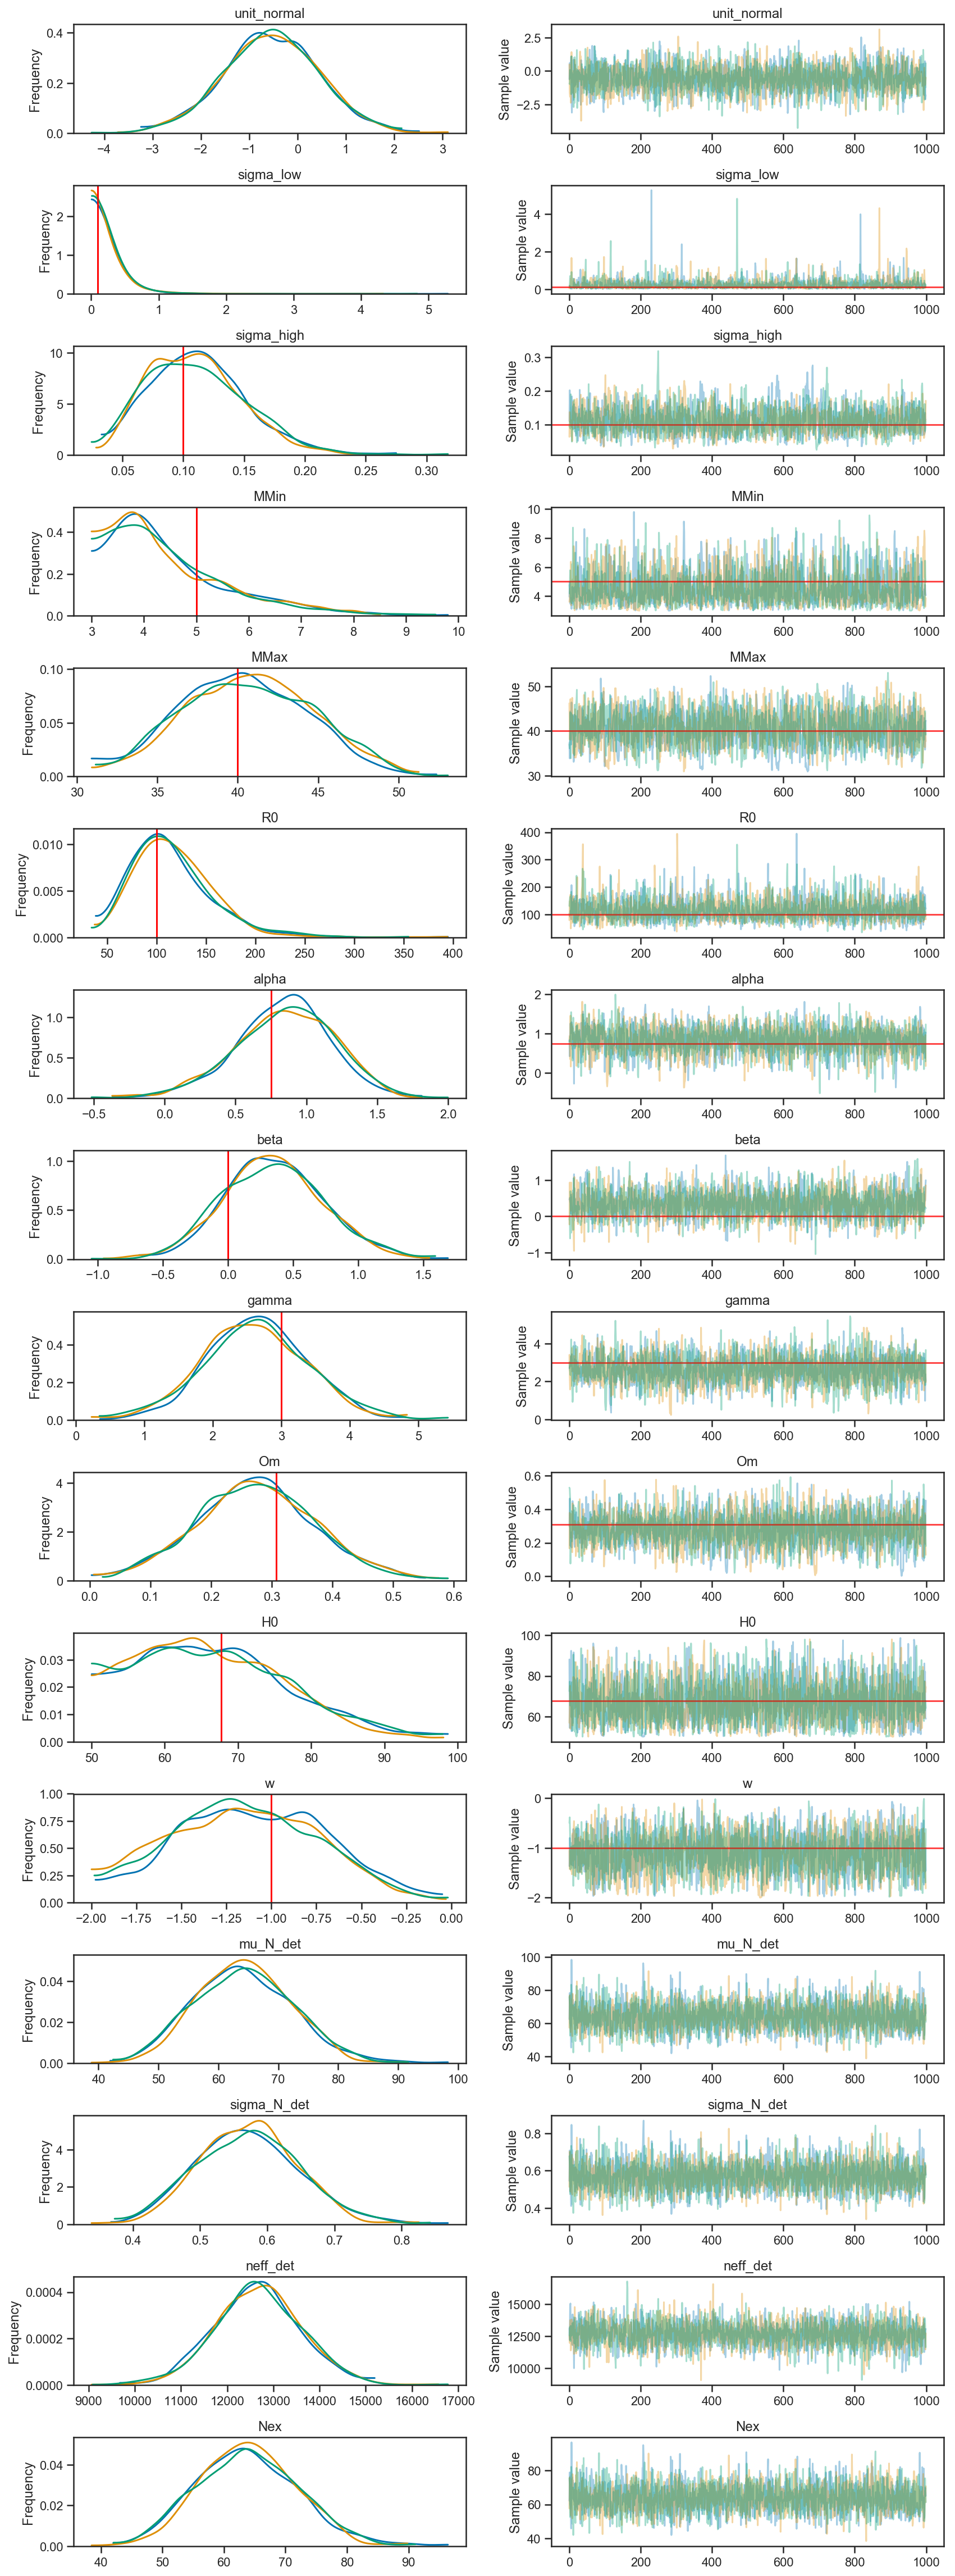

In [13]:
pm.traceplot(t2, lines=truth)

In [14]:
pm.summary(t2)

mean          sd   mc_error       hpd_2.5  \
unit_normal        -0.553608    0.970233   0.016652     -2.620745   
sigma_low           0.244928    0.292045   0.006066      0.006342   
sigma_high          0.110429    0.039125   0.001008      0.040449   
MMin                4.469079    1.142347   0.022513      3.002221   
MMax               40.527469    3.983118   0.109217     32.944780   
R0                115.428272   39.827441   0.784619     53.136479   
alpha               0.839204    0.342669   0.006929      0.124001   
beta                0.346983    0.378748   0.007359     -0.359884   
gamma               2.621627    0.751716   0.017231      1.111777   
Om                  0.273211    0.098243   0.002061      0.074648   
H0                 66.874187   10.367827   0.206552     50.040202   
w                  -1.134217    0.409150   0.009770     -1.935413   
mu_N_det__0        64.131130    8.073442   0.143909     47.559757   
sigma_N_det__0      0.571254    0.075240   0.001249      0.421740   
neff_det__0     12656.619373  929.465394  19.249906  10823.485798   
Nex__0             63.811006    8.006887   0.144861     47.411214   

                    hpd_97.5        n_eff      Rhat  
unit_normal         1.250313  2963.391319  0.999520  
sigma_low           0.711485  2209.622555  0.999524  
sigma_high          0.183310  1287.439398  1.000576  
MMin                6.816482  2068.344003  0.999851  
MMax               48.209820  1172.611802  1.002270  
R0                194.583223  2102.769271  1.000940  
alpha               1.466856  2132.721422  0.999959  
beta                1.122802  2223.018929  1.000160  
gamma               4.087639  2220.715690  1.000839  
Om                  0.464482  2343.169351  0.999787  
H0                 85.760523  2266.400244  1.000318  
w                  -0.405395  1601.652939  1.003579  
mu_N_det__0        78.334888  3096.744711  0.999574  
sigma_N_det__0      0.708643  3279.527954  0.999510  
neff_det__0     14456.678171  2564.799756  1.000131  
Nex__0             78.118244  3016.885900  0.999580

In [15]:
def plot_difference(key, t1, t2):
    sns.distplot(t1[key])
    sns.distplot(t2[key])
    
    print('Mean shift is {:.2f} sigma'.format((mean(t1[key]) - mean(t2[key]))/std(t2[key])))

/Users/wfarr/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Mean shift is 0.12 sigma


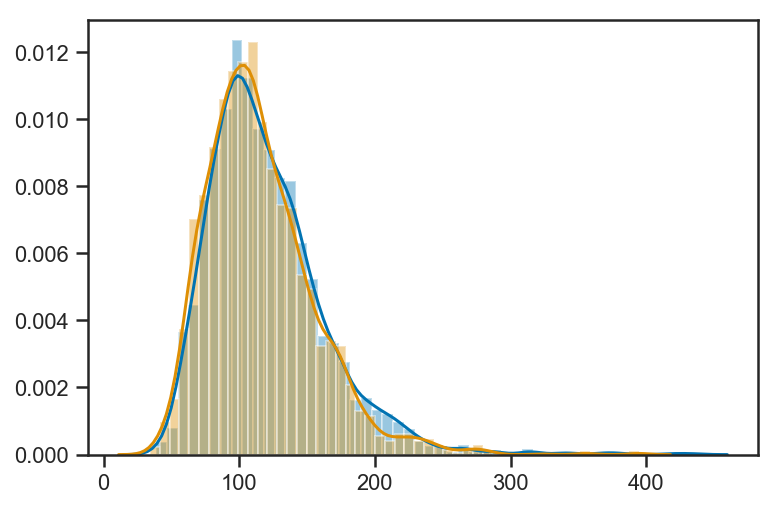

In [16]:
plot_difference('R0', t1, t2)

Mean shift is 0.06 sigma


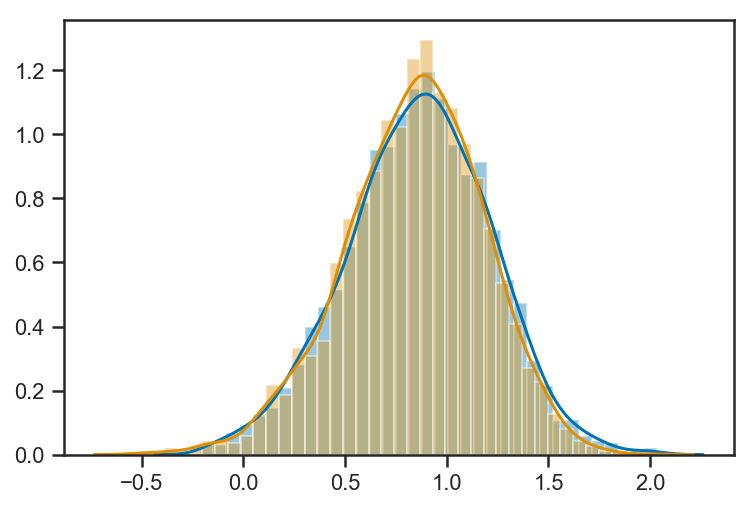

In [17]:
plot_difference('alpha', t1, t2)

Mean shift is -0.06 sigma


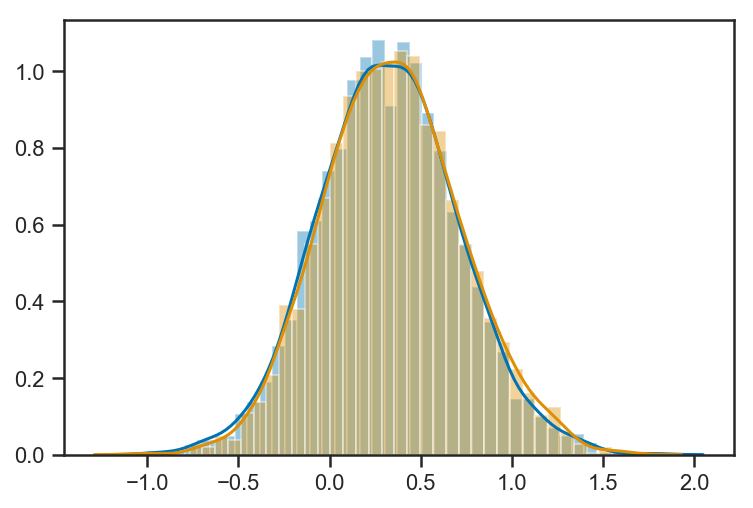

In [18]:
plot_difference('beta', t1, t2)

Mean shift is -0.04 sigma


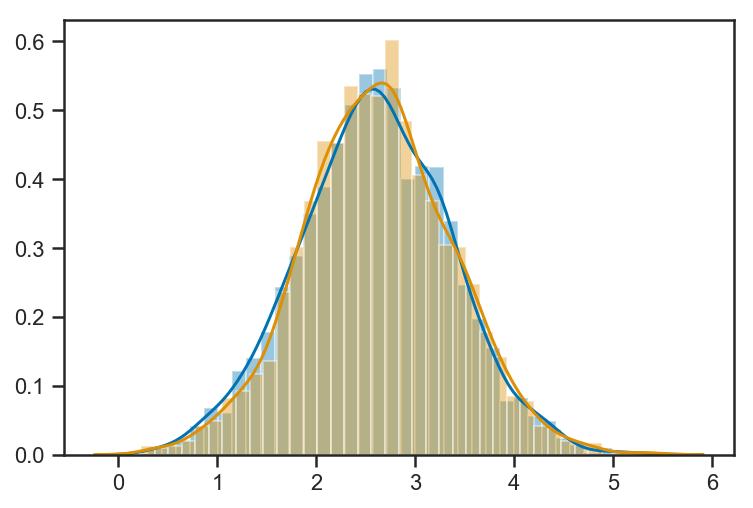

In [19]:
plot_difference('gamma', t1, t2)

Mean shift is 0.03 sigma


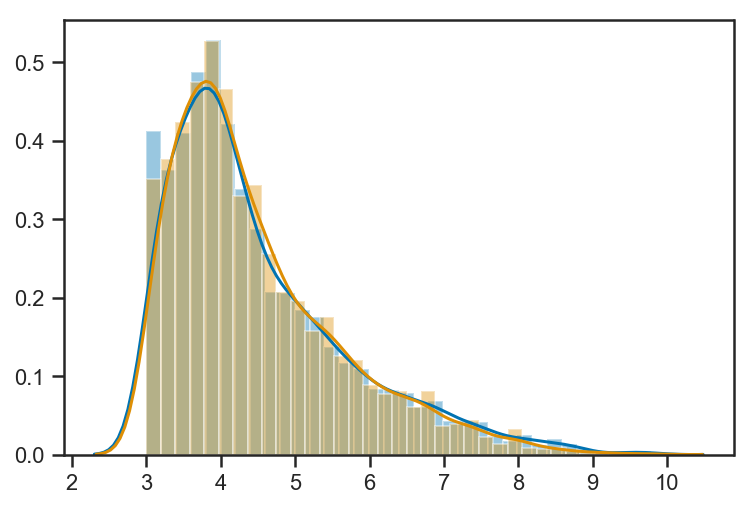

In [20]:
plot_difference('MMin', t1, t2)

Mean shift is 0.01 sigma


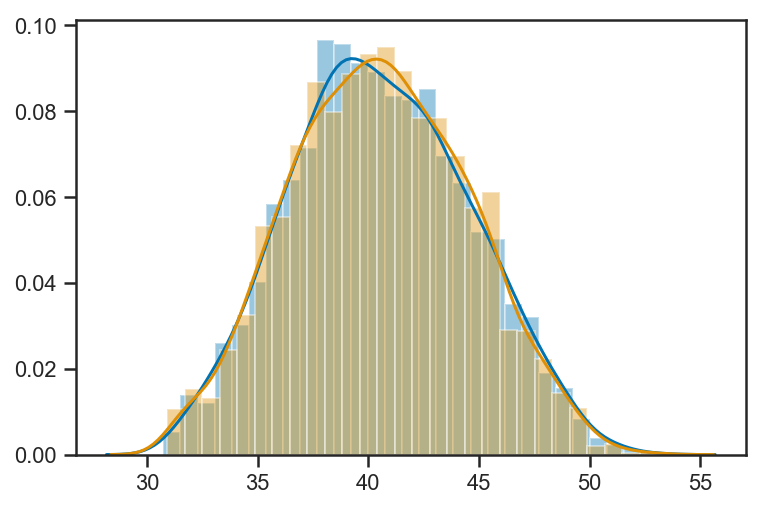

In [21]:
plot_difference('MMax', t1, t2)

Mean shift is -0.02 sigma


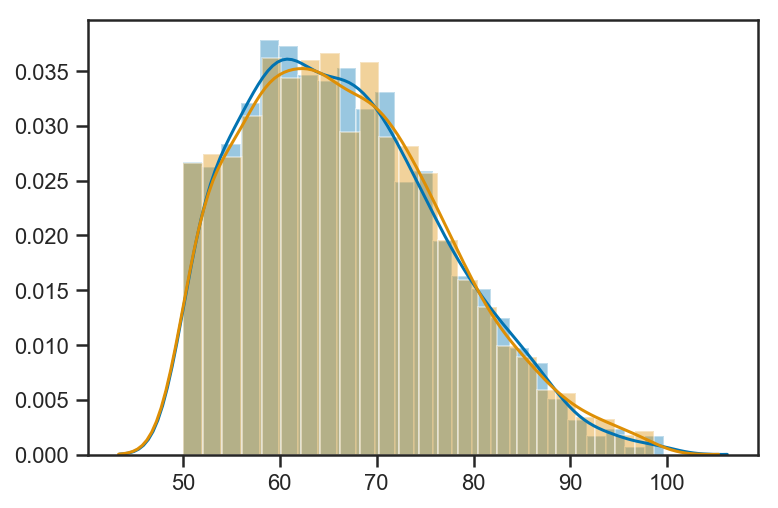

In [22]:
plot_difference('H0', t1, t2)

Mean shift is -0.00 sigma


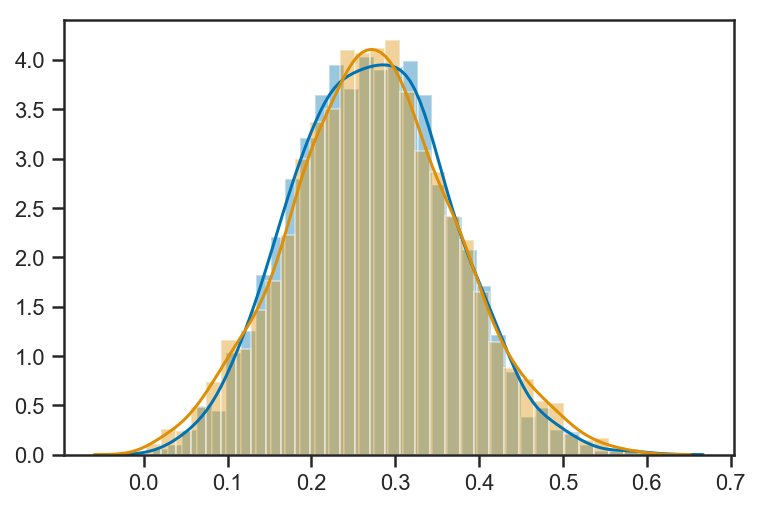

In [23]:
plot_difference('Om', t1, t2)

Mean shift is 0.01 sigma


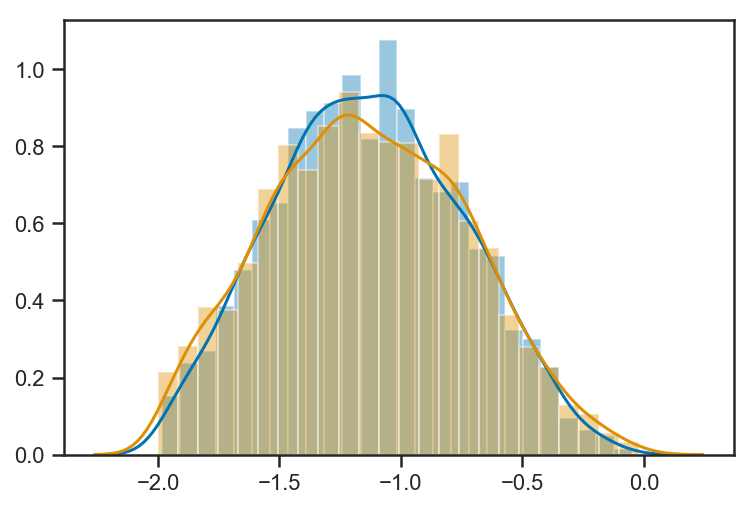

In [24]:
plot_difference('w', t1, t2)